# Singapore Resale Flat Prices Predicting

### Importing necessary packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from wordcloud import WordCloud
import plotly.express as px
import joblib
import calendar

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

### Data Preprocessing and cleaning

### Reading Datasets

In [4]:
# Read the csv file into dataframe
df1 = pd.read_csv("D:\projects\singapore_flats\singapore-flat price-1990-1999.csv")

# Print the basic information and first few rows of the dataframe
print(df1.info())
print(df1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
None
     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04

In [5]:
# Read the csv file into dataframe
df2 = pd.read_csv("D:\projects\singapore_flats\singapore-flat price-2000-2012.csv")

# Print the basic information and first few rows of the dataframe
print(df2.info())
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                369651 non-null  object 
 1   town                 369651 non-null  object 
 2   flat_type            369651 non-null  object 
 3   block                369651 non-null  object 
 4   street_name          369651 non-null  object 
 5   storey_range         369651 non-null  object 
 6   floor_area_sqm       369651 non-null  float64
 7   flat_model           369651 non-null  object 
 8   lease_commence_date  369651 non-null  int64  
 9   resale_price         369651 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 28.2+ MB
None
     month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04

In [6]:
# Read the csv file into dataframe
df3 = pd.read_csv("D:\projects\singapore_flats\singapore-flat price-2012-2014.csv")

# Print the basic information and first few rows of the dataframe
print(df3.info())
print(df3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                52203 non-null  object 
 1   town                 52203 non-null  object 
 2   flat_type            52203 non-null  object 
 3   block                52203 non-null  object 
 4   street_name          52203 non-null  object 
 5   storey_range         52203 non-null  object 
 6   floor_area_sqm       52203 non-null  float64
 7   flat_model           52203 non-null  object 
 8   lease_commence_date  52203 non-null  int64  
 9   resale_price         52203 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.0+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2012-03  ANG MO KIO    2 ROOM   172   ANG MO KIO AVE 4     06 TO 10   
1  2012-03  ANG MO KIO    2 ROOM   510   ANG MO KIO AVE 8     01 TO 05   
2 

In [7]:
# Read the csv file into dataframe
df4 = pd.read_csv("D:\projects\singapore_flats\singapore-flat price-2015-2016.csv")

# Print the basic information and first few rows of the dataframe
print(df4.info())
print(df4.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                37153 non-null  object 
 1   town                 37153 non-null  object 
 2   flat_type            37153 non-null  object 
 3   block                37153 non-null  object 
 4   street_name          37153 non-null  object 
 5   storey_range         37153 non-null  object 
 6   floor_area_sqm       37153 non-null  float64
 7   flat_model           37153 non-null  object 
 8   lease_commence_date  37153 non-null  int64  
 9   remaining_lease      37153 non-null  int64  
 10  resale_price         37153 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 3.1+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    

In [8]:
# Read the csv file into dataframe
df5 = pd.read_csv("D:\projects\singapore_flats\singapore-flat price-2017-2024.csv")

# Print the basic information and first few rows of the dataframe
print(df5.info())
print(df5.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184336 entries, 0 to 184335
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                184336 non-null  object 
 1   town                 184336 non-null  object 
 2   flat_type            184336 non-null  object 
 3   block                184336 non-null  object 
 4   street_name          184336 non-null  object 
 5   storey_range         184336 non-null  object 
 6   floor_area_sqm       184336 non-null  float64
 7   flat_model           184336 non-null  object 
 8   lease_commence_date  184336 non-null  int64  
 9   remaining_lease      184336 non-null  object 
 10  resale_price         184336 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.5+ MB
None
     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01

### Splitting the numerical part of the remaining lease from DF5

In [9]:
# Extract the numeric part of 'remaining_lease', split by space, and convert to integer
df5['remaining_lease'] = df5['remaining_lease'].str.split(' ').str[0].astype('int64')

# Display the updated 'remaining_lease' column
print(df5['remaining_lease'])

# Print the basic information and first few rows of the dataframe
print(df5.info())
print(df5.head())

0         61
1         60
2         62
3         62
4         62
          ..
184331    62
184332    63
184333    60
184334    60
184335    60
Name: remaining_lease, Length: 184336, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184336 entries, 0 to 184335
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                184336 non-null  object 
 1   town                 184336 non-null  object 
 2   flat_type            184336 non-null  object 
 3   block                184336 non-null  object 
 4   street_name          184336 non-null  object 
 5   storey_range         184336 non-null  object 
 6   floor_area_sqm       184336 non-null  float64
 7   flat_model           184336 non-null  object 
 8   lease_commence_date  184336 non-null  int64  
 9   remaining_lease      184336 non-null  int64  
 10  resale_price         184336 non-null  float64
dtypes: float64(2), int64(2), o

### Merging all the datasets

In [10]:
# Merging datasets df1, df2, df3, df4 and df5
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Print the basic information and first few rows of the merged dataframe
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930539 entries, 0 to 930538
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                930539 non-null  object 
 1   town                 930539 non-null  object 
 2   flat_type            930539 non-null  object 
 3   block                930539 non-null  object 
 4   street_name          930539 non-null  object 
 5   storey_range         930539 non-null  object 
 6   floor_area_sqm       930539 non-null  float64
 7   flat_model           930539 non-null  object 
 8   lease_commence_date  930539 non-null  int64  
 9   resale_price         930539 non-null  float64
 10  remaining_lease      221489 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 78.1+ MB
None
     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  

In [11]:
# Print shape of the dataset
df.shape

(930539, 11)

In [12]:
# Print the Columns in the dataset
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [13]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,930539.0,95.688992,25.818864,28.0,73.0,93.0,113.0,307.0
lease_commence_date,930539.0,1988.312737,10.700772,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,930539.0,321832.952703,171456.045639,5000.0,194000.0,298000.0,419000.0,1588000.0
remaining_lease,221489.0,74.092632,13.511253,41.0,63.0,74.0,85.0,97.0


In [14]:
# Print unique values of every columns
df.nunique()

month                   415
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          212
flat_model               34
lease_commence_date      55
resale_price           9571
remaining_lease          57
dtype: int64

### Splitting the month column to month and year

In [15]:
# Split 'month' column into 'year' and 'month' columns
df[['year', 'month']] = df['month'].str.split('-', expand=True)

# Convert 'year' and 'month' columns to numeric types if needed
df['year'] = pd.to_numeric(df['year'])
df['month'] = pd.to_numeric(df['month'])

# Display the basic information and the updated DataFrame
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930539 entries, 0 to 930538
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                930539 non-null  int64  
 1   town                 930539 non-null  object 
 2   flat_type            930539 non-null  object 
 3   block                930539 non-null  object 
 4   street_name          930539 non-null  object 
 5   storey_range         930539 non-null  object 
 6   floor_area_sqm       930539 non-null  float64
 7   flat_model           930539 non-null  object 
 8   lease_commence_date  930539 non-null  int64  
 9   resale_price         930539 non-null  float64
 10  remaining_lease      221489 non-null  float64
 11  year                 930539 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 85.2+ MB
None
   month        town flat_type block       street_name storey_range  \
0      1  ANG MO KIO    1 ROOM   309

### Calculating the remaining lease for the Nan values

In [16]:
# Calculate remaining lease for rows with NaN values
df['remaining_lease'].fillna(99 - (df['year'] - df['lease_commence_date']), inplace=True)

# Verify the results
print(df[['lease_commence_date', 'year', 'remaining_lease']])

        lease_commence_date  year  remaining_lease
0                      1977  1990             86.0
1                      1977  1990             86.0
2                      1977  1990             86.0
3                      1977  1990             86.0
4                      1976  1990             85.0
...                     ...   ...              ...
930534                 1987  2024             62.0
930535                 1988  2024             63.0
930536                 1985  2024             60.0
930537                 1985  2024             60.0
930538                 1985  2024             60.0

[930539 rows x 3 columns]


In [17]:
# print dataset information after removing Nan values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930539 entries, 0 to 930538
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                930539 non-null  int64  
 1   town                 930539 non-null  object 
 2   flat_type            930539 non-null  object 
 3   block                930539 non-null  object 
 4   street_name          930539 non-null  object 
 5   storey_range         930539 non-null  object 
 6   floor_area_sqm       930539 non-null  float64
 7   flat_model           930539 non-null  object 
 8   lease_commence_date  930539 non-null  int64  
 9   resale_price         930539 non-null  float64
 10  remaining_lease      930539 non-null  float64
 11  year                 930539 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 85.2+ MB


In [18]:
# print dataset Null values info after removing Nan values 
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
dtype: int64

### Checking for repetitions in categorical columns

In [19]:
# Printing unique values of the categorical columns to check for repetitions 
print(df['town'].unique())
print(df['flat_type'].unique())
print(df['block'].unique())
print(df['street_name'].unique())
print(df['storey_range'].unique())
print(df['flat_model'].unique())

['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']
['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION' 'MULTI-GENERATION']
['309' '216' '211' ... '240A' '460D' '83A']
['ANG MO KIO AVE 1' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4'
 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 8'
 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 9' 'ANG MO KIO AVE 2'
 'BEDOK RESERVOIR RD' 'BEDOK NTH ST 3' 'BEDOK STH RD' 'NEW UPP CHANGI RD'
 'BEDOK NTH RD' 'BEDOK STH AVE 1' 'CHAI CHEE RD' 'CHAI CHEE DR'
 'BEDOK NTH AVE 4' 'BEDOK STH AVE 3' 'BEDOK STH AVE 2' 'BEDOK NTH ST 2'
 'BEDOK NTH ST 4' 'BEDOK NTH AVE 2' 'BEDOK NTH AVE 3' 'BEDOK NTH AVE 1'
 'BEDOK NTH ST 1' 'CHAI CHEE ST' 'SIN MING RD' 'SHUNFU

### Standardizing the columns flat_model and flat_type to make them consistent

In [20]:
# Changing the case to uppercase for consistency
df['flat_model'] = df['flat_model'].str.upper()

# Printing the unique values
print(df['flat_model'].unique())

['IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT'
 'ADJOINED FLAT' 'PREMIUM MAISONETTE' 'MODEL A2' 'DBSS' 'TYPE S1'
 'TYPE S2' 'PREMIUM APARTMENT LOFT' '3GEN']


In [21]:
# Convert 'flat_type' values to lowercase
df['flat_type'] = df['flat_type'].str.lower()

# Standardize values to a common set of categories
type_mapping = {
    '1 room': '1 room',
    '3 room': '3 room',
    '4 room': '4 room',
    '5 room': '5 room',
    '2 room': '2 room',
    'executive': 'executive',
    'multi generation': 'multi generation',
    'multi-generation': 'multi generation'
}

df['flat_type'] = df['flat_type'].map(type_mapping)

# Changing the case to Uppercase
df['flat_type'] = df['flat_type'].str.upper()

# Display the unique values
print(df['flat_type'].unique())

['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']


In [22]:
df.to_csv("combine.csv")

### Removing the outliers in the columns 'remaining_lease' and 'storey_range'

In [23]:
# Checking for number of rows with remaining lease period more than 99
print((df['remaining_lease']>99).sum())

# Create a boolean mask to identify rows containing any of the specified values
mask = df['remaining_lease']>99

# Use the boolean mask to drop rows
df = df[~mask]

# Display the DataFrame after dropping rows
print(df)

51
        month        town  flat_type block       street_name storey_range  \
0           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4           1  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...       ...         ...        ...   ...               ...          ...   
930534      7      YISHUN  EXECUTIVE   792    YISHUN RING RD     07 TO 09   
930535      7      YISHUN  EXECUTIVE   352    YISHUN RING RD     04 TO 06   
930536      7      YISHUN  EXECUTIVE   277      YISHUN ST 22     01 TO 03   
930537      7      YISHUN  EXECUTIVE   277      YISHUN ST 22     04 TO 06   
930538      7      YISHUN  EXECUTIVE   277      YISHUN ST 22     01 TO 03   

        floor_area_sqm      flat_model  lease_commence_date  resale_pric

In [24]:
# Drop rows where the 'storey_range' column contains specific values
values_to_drop = ['01 TO 05', '06 TO 10', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30', '31 TO 35', '36 TO 40']

# Create a boolean mask to identify rows containing any of the specified values
mask = df['storey_range'].isin(values_to_drop)

# Use the boolean mask to drop rows
df = df[~mask]

# Display the DataFrame after dropping rows
print(df)

        month        town  flat_type block       street_name storey_range  \
0           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3           1  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4           1  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...       ...         ...        ...   ...               ...          ...   
930534      7      YISHUN  EXECUTIVE   792    YISHUN RING RD     07 TO 09   
930535      7      YISHUN  EXECUTIVE   352    YISHUN RING RD     04 TO 06   
930536      7      YISHUN  EXECUTIVE   277      YISHUN ST 22     01 TO 03   
930537      7      YISHUN  EXECUTIVE   277      YISHUN ST 22     04 TO 06   
930538      7      YISHUN  EXECUTIVE   277      YISHUN ST 22     01 TO 03   

        floor_area_sqm      flat_model  lease_commence_date  resale_price  

### Splitting the Storey range to lower bound and upper bound

In [25]:
# Split the 'storey_range' into lower and upper bounds
df[['lower_bound', 'upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['lower_bound'] = pd.to_numeric(df['lower_bound'])
df['upper_bound'] = pd.to_numeric(df['upper_bound'])

# Display the DataFrame with lower and upper bounds
print(df[['storey_range', 'lower_bound', 'upper_bound']])

       storey_range  lower_bound  upper_bound
0          10 TO 12           10           12
1          04 TO 06            4            6
2          10 TO 12           10           12
3          07 TO 09            7            9
4          04 TO 06            4            6
...             ...          ...          ...
930534     07 TO 09            7            9
930535     04 TO 06            4            6
930536     01 TO 03            1            3
930537     04 TO 06            4            6
930538     01 TO 03            1            3

[923650 rows x 3 columns]


### Adding new columns

In [26]:
# Adding a new column 'price_per_sqm'
df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']

# Adding a new column 'years_holding'
df['years_holding'] = df['year'] - df['lease_commence_date']

# Adding a new column 'current_remaining_lease'
df['current_remaining_lease'] = df['remaining_lease'] - (2024 - df['year'])

# Display the DataFrame with the new column
print(df[['resale_price', 'floor_area_sqm', 'price_per_sqm']])
print(df[['year', 'lease_commence_date', 'remaining_lease', 'years_holding', 'current_remaining_lease']])

        resale_price  floor_area_sqm  price_per_sqm
0             9000.0            31.0     290.322581
1             6000.0            31.0     193.548387
2             8000.0            31.0     258.064516
3             6000.0            31.0     193.548387
4            47200.0            73.0     646.575342
...              ...             ...            ...
930534      820000.0           147.0    5578.231293
930535      865000.0           146.0    5924.657534
930536      770000.0           146.0    5273.972603
930537      800000.0           146.0    5479.452055
930538      775000.0           146.0    5308.219178

[923650 rows x 3 columns]
        year  lease_commence_date  remaining_lease  years_holding  \
0       1990                 1977             86.0             13   
1       1990                 1977             86.0             13   
2       1990                 1977             86.0             13   
3       1990                 1977             86.0             13   
4   

In [27]:
# Saving the final dataset to a file
df = df.reset_index(drop=True)
df.to_csv('Singapore_flats_final.csv', index=False)

## Exploratory Data Analysis

### Displaying basic statistics of the columns

In [28]:
# Reading the dataset
df = pd.read_csv('Singapore_flats_final.csv')

In [29]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923650 entries, 0 to 923649
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    923650 non-null  int64  
 1   town                     923650 non-null  object 
 2   flat_type                923650 non-null  object 
 3   block                    923650 non-null  object 
 4   street_name              923650 non-null  object 
 5   storey_range             923650 non-null  object 
 6   floor_area_sqm           923650 non-null  float64
 7   flat_model               923650 non-null  object 
 8   lease_commence_date      923650 non-null  int64  
 9   resale_price             923650 non-null  float64
 10  remaining_lease          923650 non-null  float64
 11  year                     923650 non-null  int64  
 12  lower_bound              923650 non-null  int64  
 13  upper_bound              923650 non-null  int64  
 14  pric

In [30]:
# Display the first few rows of the dataset
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,lower_bound,upper_bound,price_per_sqm,years_holding,current_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,86.0,1990,10,12,290.322581,13,52.0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,86.0,1990,4,6,193.548387,13,52.0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,86.0,1990,10,12,258.064516,13,52.0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,86.0,1990,7,9,193.548387,13,52.0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,85.0,1990,4,6,646.575342,14,51.0


In [31]:
# Check for missing values
print(df.isnull().sum())

month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease            0
year                       0
lower_bound                0
upper_bound                0
price_per_sqm              0
years_holding              0
current_remaining_lease    0
dtype: int64


### Univariate Analysis

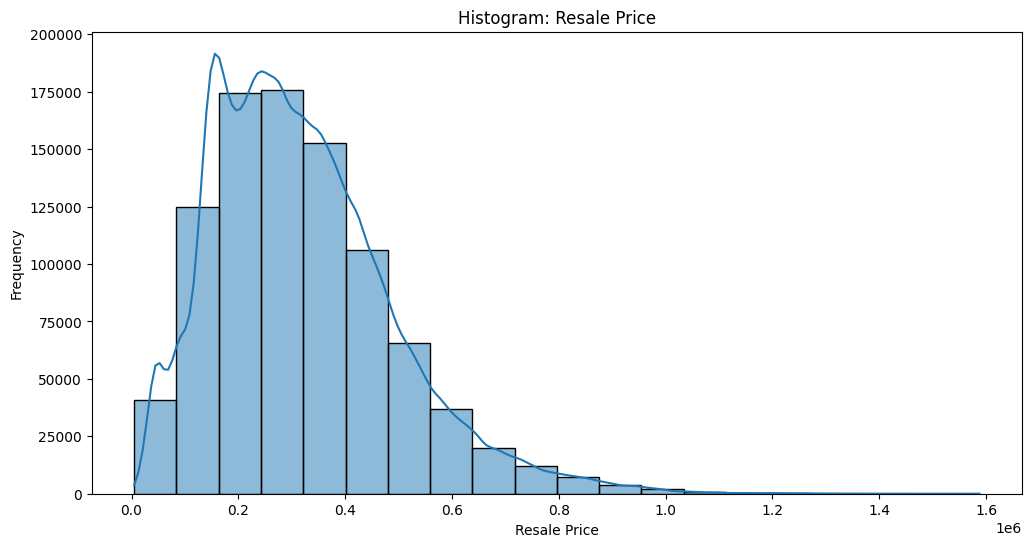

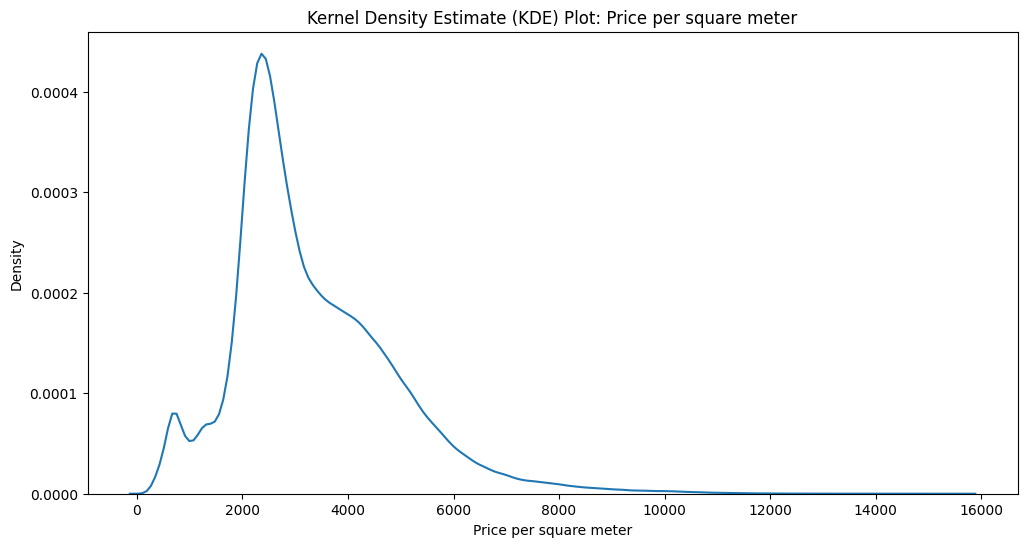

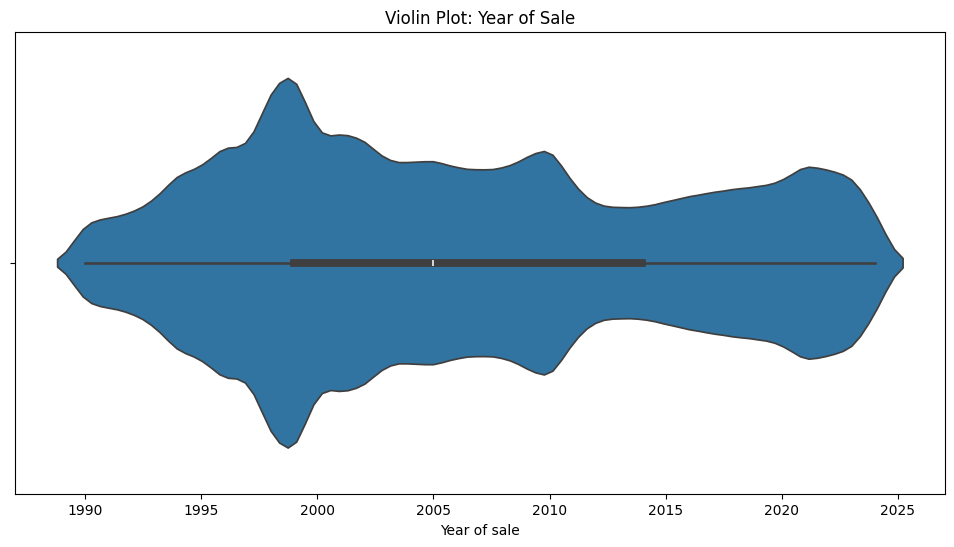

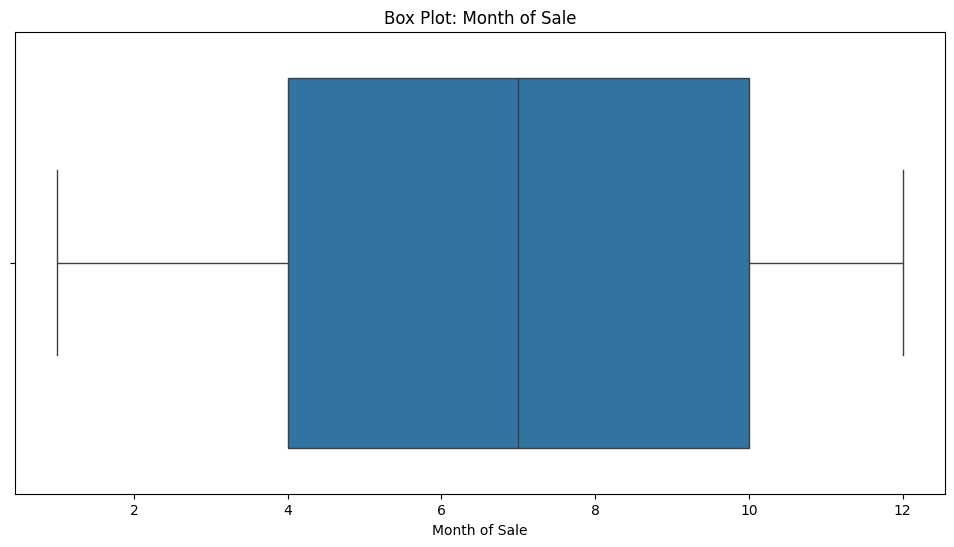

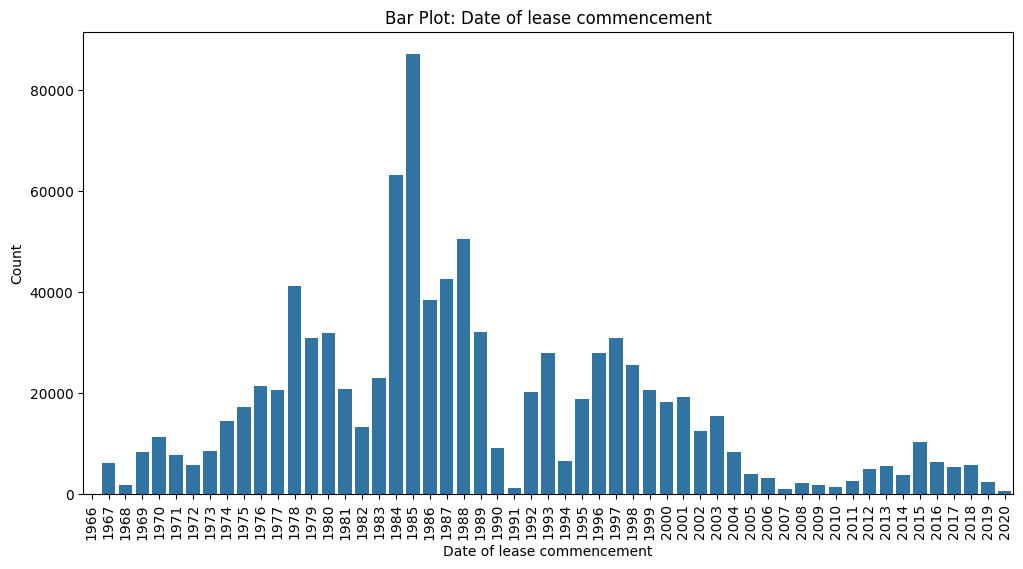

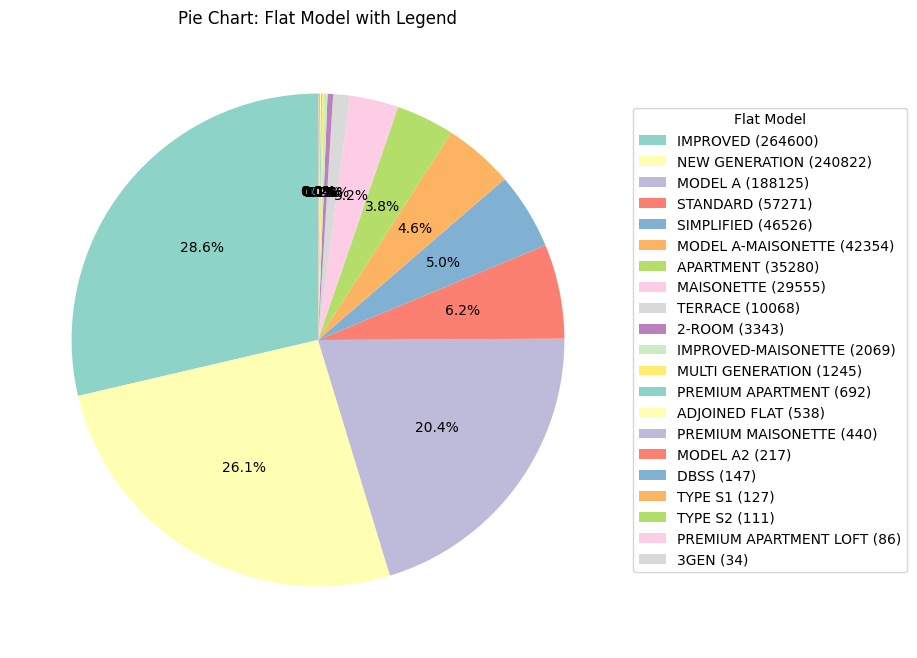

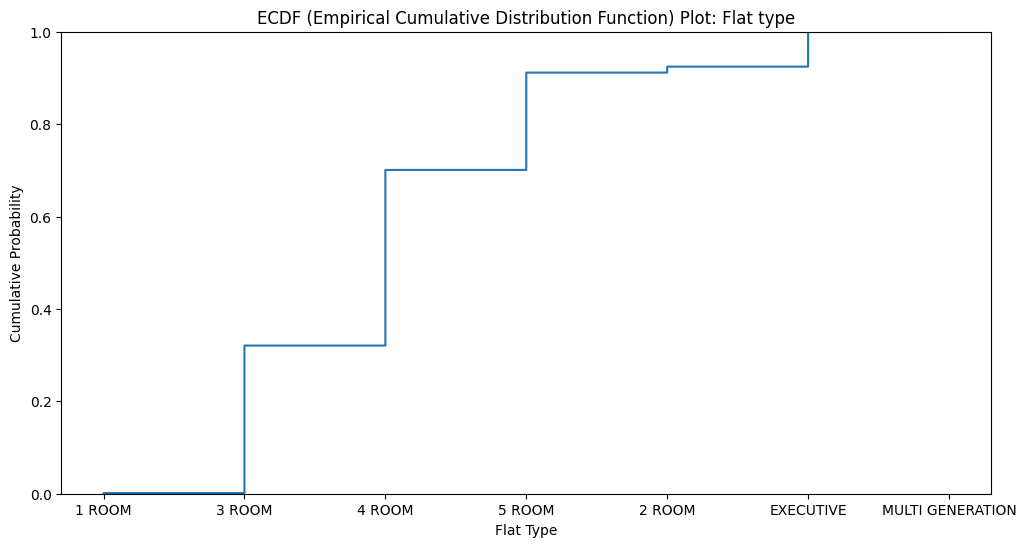

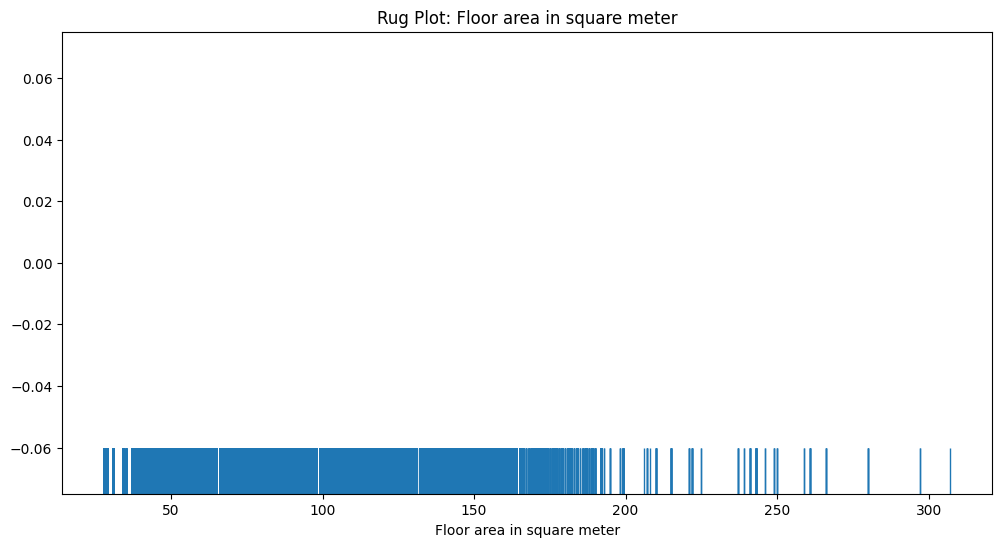

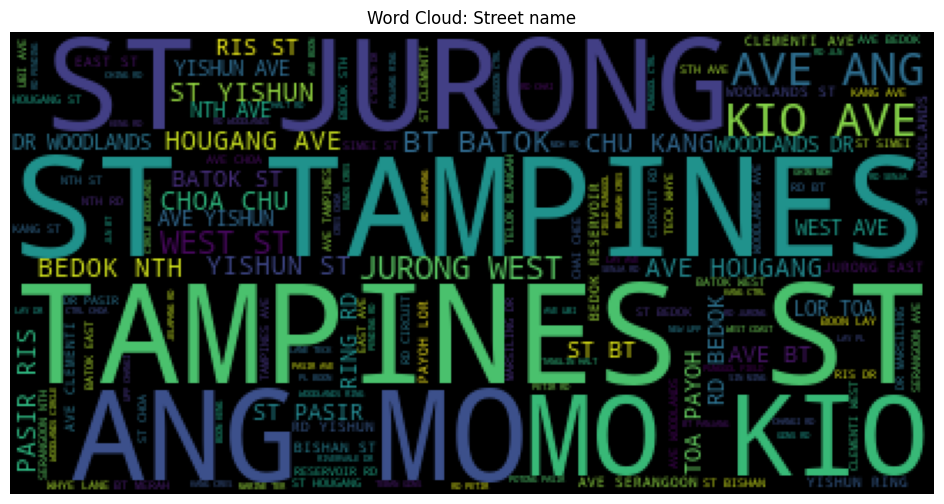

In [32]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['resale_price'], bins=20, kde=True)
plt.title('Histogram: Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

# KDE Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(df['price_per_sqm'])
plt.title('Kernel Density Estimate (KDE) Plot: Price per square meter')
plt.xlabel('Price per square meter')
plt.ylabel('Density')
plt.show()

# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['year'])
plt.title('Violin Plot: Year of Sale')
plt.xlabel('Year of sale')
plt.show()

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['month'])
plt.title('Box Plot: Month of Sale')
plt.xlabel('Month of Sale')
plt.show()

# Bar Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='lease_commence_date', data=df)
plt.title('Bar Plot: Date of lease commencement')
plt.xlabel('Date of lease commencement')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# Pie Chart with Legend for Improved Label Display
plt.figure(figsize=(8, 8))
label_counts = df['flat_model'].value_counts()
unique_labels = df['flat_model'].unique()

plt.pie(label_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(unique_labels)))
legend_labels = [f"{label} ({count})" for label, count in zip(unique_labels, label_counts)]
plt.legend(legend_labels, title='Flat Model', bbox_to_anchor=(1, 0.5), loc="center left")

plt.title('Pie Chart: Flat Model with Legend')
plt.show()


# ECDF Plot
plt.figure(figsize=(12, 6))
sns.ecdfplot(df['flat_type'])
plt.title('ECDF (Empirical Cumulative Distribution Function) Plot: Flat type')
plt.xlabel('Flat Type')
plt.ylabel('Cumulative Probability')
plt.show()

# Rug Plot
plt.figure(figsize=(12, 6))
sns.rugplot(df['floor_area_sqm'], height=0.1)
plt.title('Rug Plot: Floor area in square meter')
plt.xlabel('Floor area in square meter')
plt.show()

# Word Cloud (for text-based columns)
wordcloud = WordCloud().generate(' '.join(df['street_name']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud: Street name')
plt.show()

### Bivariate Analysis

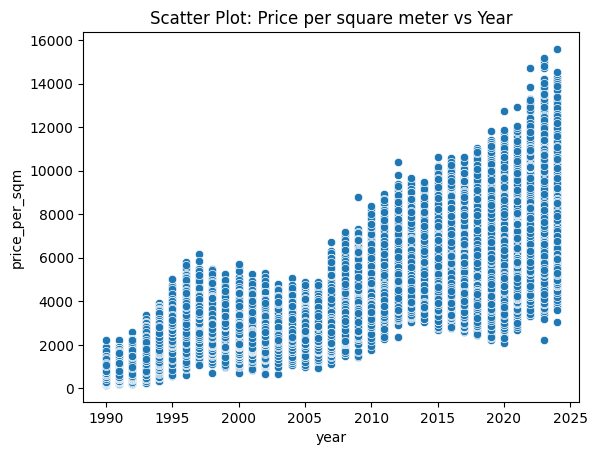

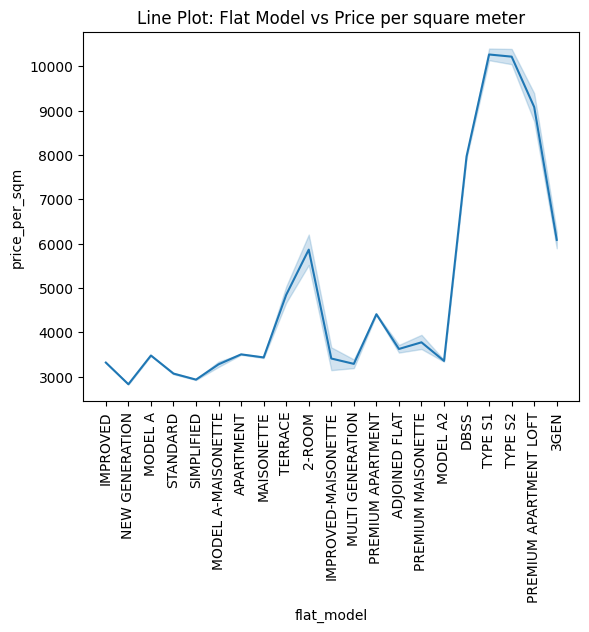

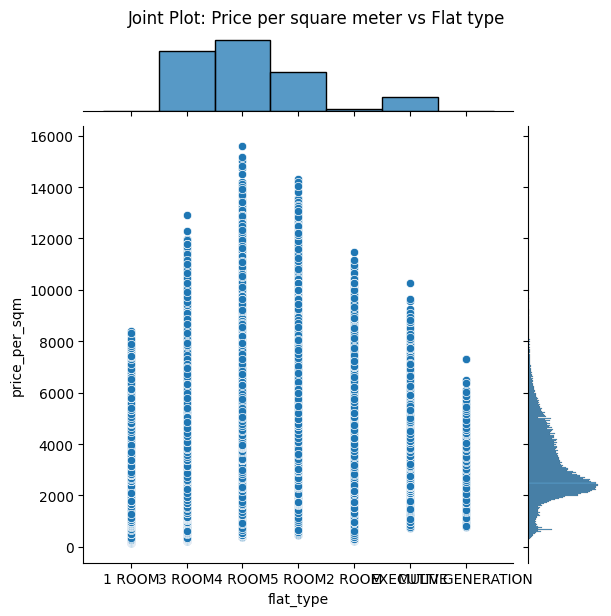

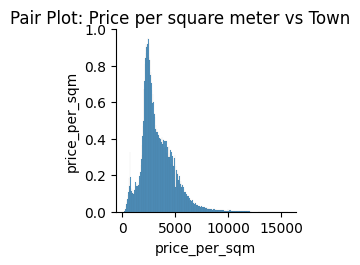

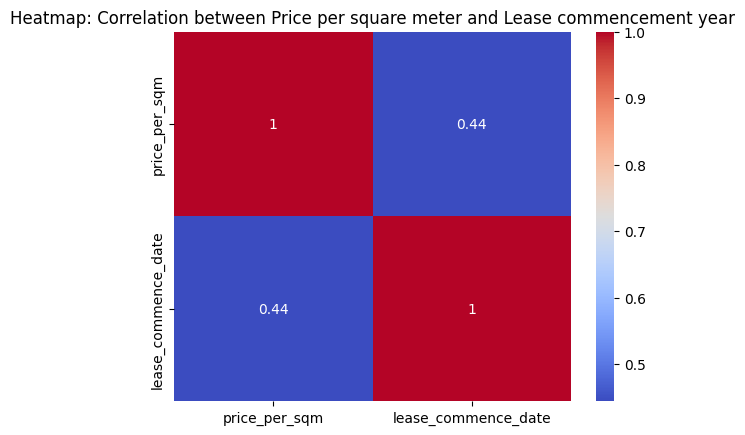

C:\Users\karth\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


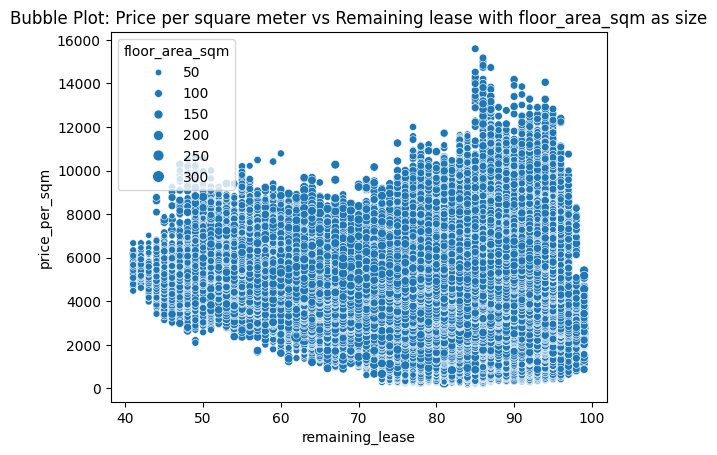

In [33]:
# Scatter Plot
sns.scatterplot(x='year', y='price_per_sqm', data=df)
plt.title('Scatter Plot: Price per square meter vs Year')
plt.show()

# Line plot
sns.lineplot(x='flat_model', y='price_per_sqm', data=df)
plt.title('Line Plot: Flat Model vs Price per square meter')
plt.xticks(rotation=90)
plt.show()

# Joint plot
sns.jointplot(x='flat_type', y='price_per_sqm', data=df)
plt.suptitle('Joint Plot: Price per square meter vs Flat type', y=1.02)
plt.show()

# Pair plot
sns.pairplot(df[['price_per_sqm', 'town']])
plt.suptitle('Pair Plot: Price per square meter vs Town', y=1.02)
plt.show()

# Heatmap
sns.heatmap(df[['price_per_sqm', 'lease_commence_date']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation between Price per square meter and Lease commencement year')
plt.show()

# Bubble plot
sns.scatterplot(x='remaining_lease', y='price_per_sqm', size='floor_area_sqm', data=df)
plt.title('Bubble Plot: Price per square meter vs Remaining lease with floor_area_sqm as size')
plt.show()

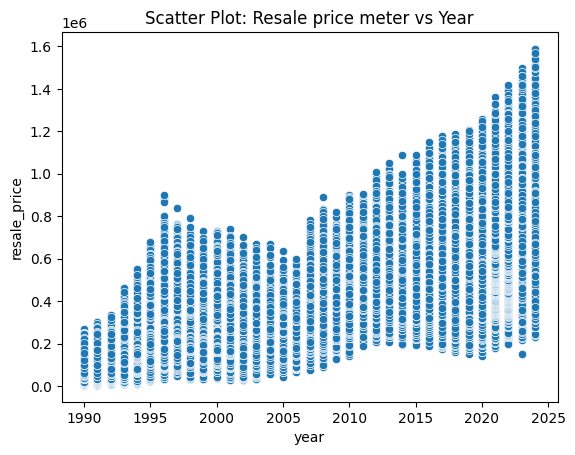

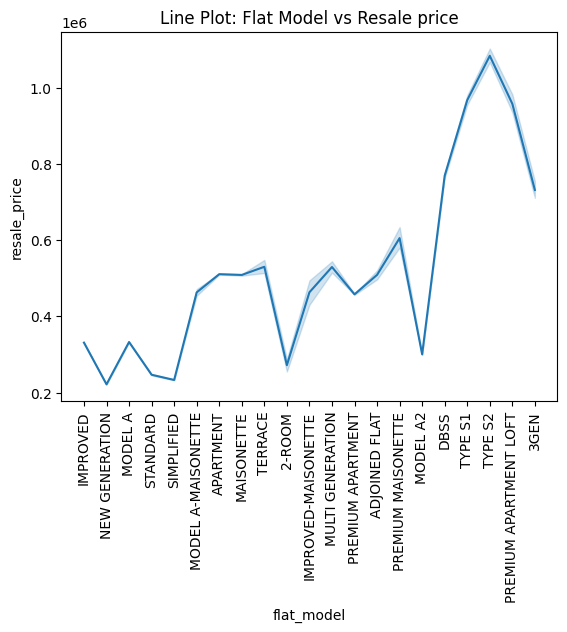

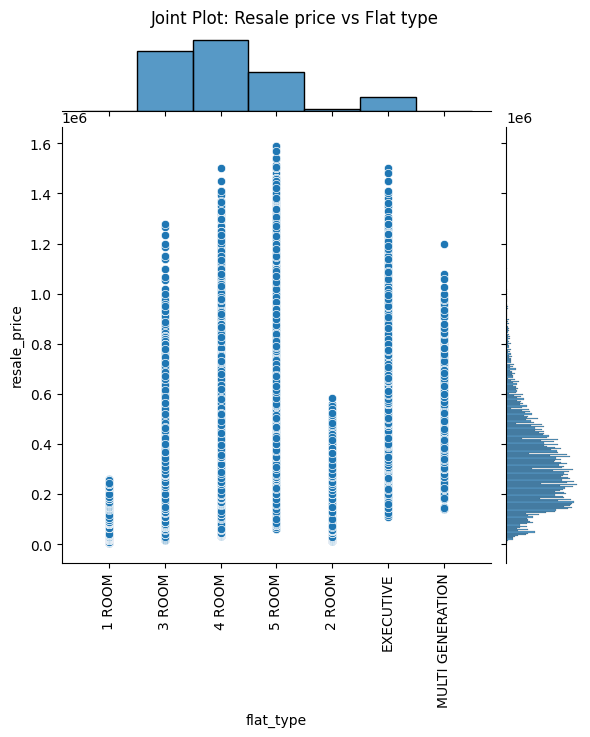

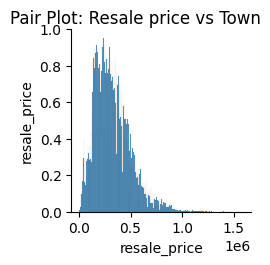

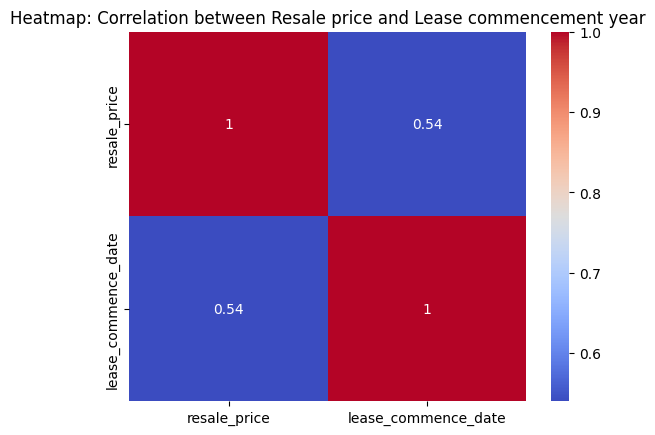

C:\Users\karth\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


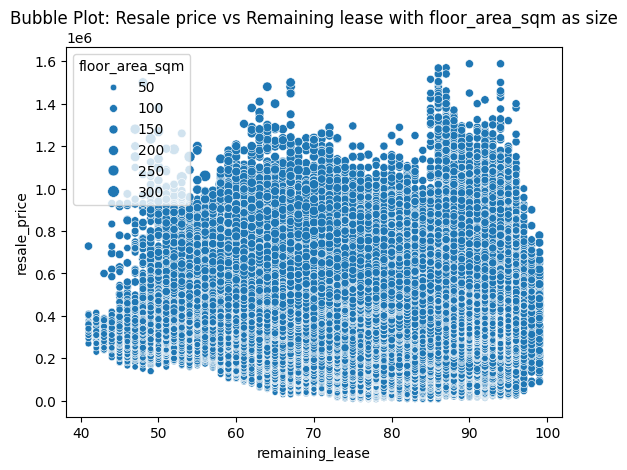

In [34]:
# Scatter Plot
sns.scatterplot(x='year', y='resale_price', data=df)
plt.title('Scatter Plot: Resale price meter vs Year')
plt.show()

# Line plot
sns.lineplot(x='flat_model', y='resale_price', data=df)
plt.title('Line Plot: Flat Model vs Resale price')
plt.xticks(rotation=90)
plt.show()

# Joint plot
sns.jointplot(x='flat_type', y='resale_price', data=df)
plt.suptitle('Joint Plot: Resale price vs Flat type', y=1.02)
plt.xticks(rotation=90)
plt.show()

# Pair plot
sns.pairplot(df[['resale_price', 'town']])
plt.suptitle('Pair Plot: Resale price vs Town', y=1.02)
plt.show()

# Heatmap
sns.heatmap(df[['resale_price', 'lease_commence_date']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation between Resale price and Lease commencement year')
plt.show()

# Bubble plot
sns.scatterplot(x='remaining_lease', y='resale_price', size='floor_area_sqm', data=df)
plt.title('Bubble Plot: Resale price vs Remaining lease with floor_area_sqm as size')
plt.show()

### Detect aberrant or missing values

In [35]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Detect outliers using Z-score
z_scores = zscore(df[['resale_price', 'floor_area_sqm']])
outliers = (abs(z_scores) > 3).all(axis=1)
print("Number of outliers:", outliers.sum())

Missing Values:
month                      0
town                       0
flat_type                  0
block                      0
street_name                0
storey_range               0
floor_area_sqm             0
flat_model                 0
lease_commence_date        0
resale_price               0
remaining_lease            0
year                       0
lower_bound                0
upper_bound                0
price_per_sqm              0
years_holding              0
current_remaining_lease    0
dtype: int64
Number of outliers: 212


### Multivariate analysis

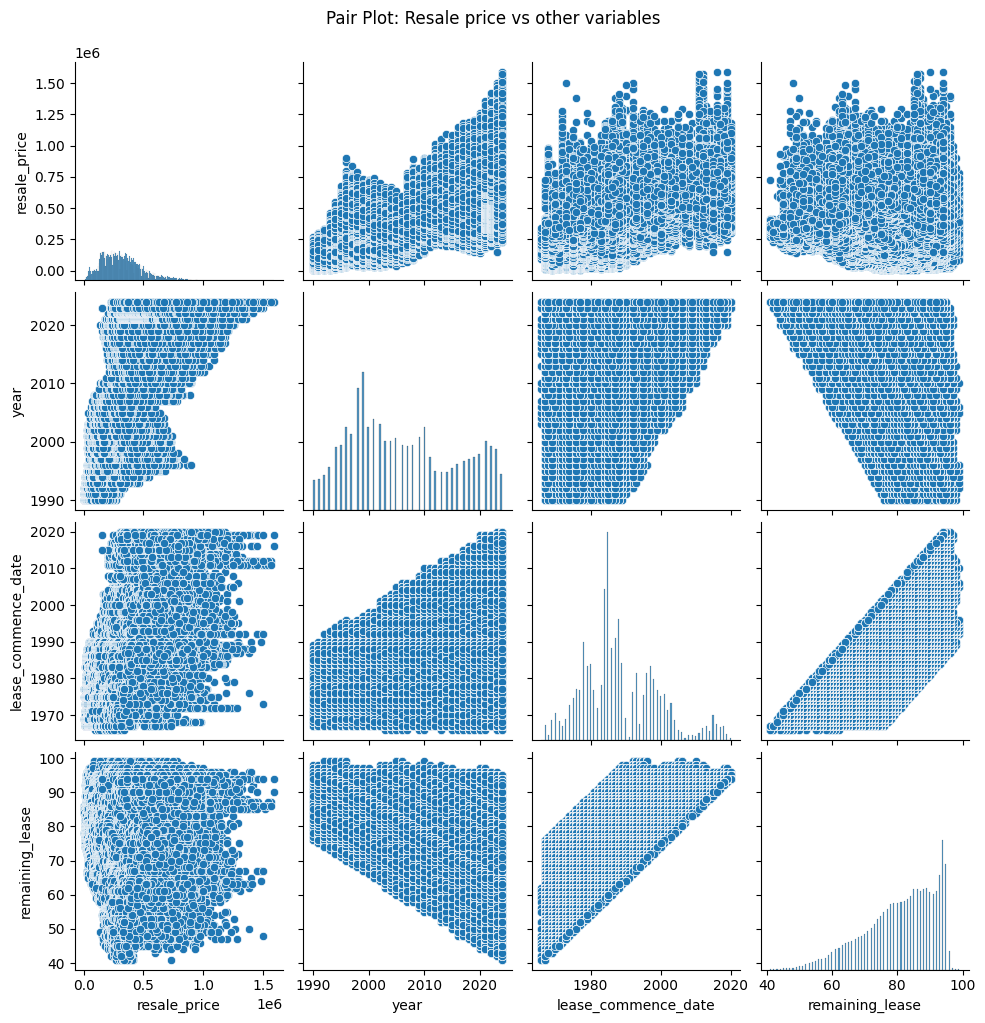

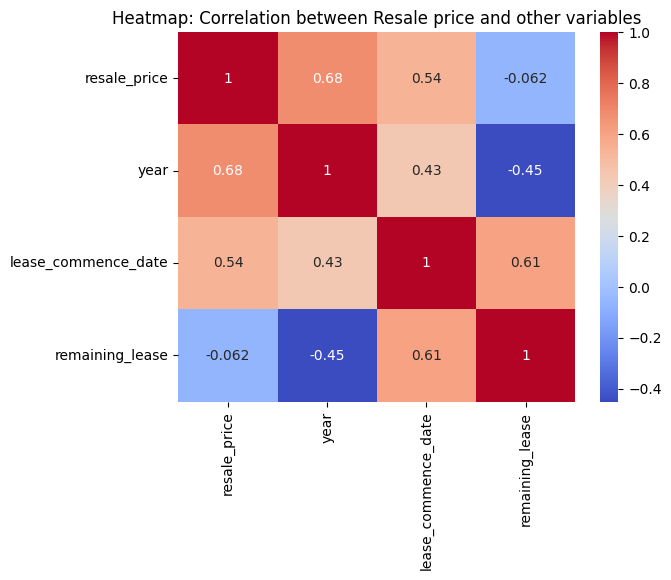

In [36]:
# Pair plot
sns.pairplot(df[['resale_price', 'year', 'lease_commence_date', 'remaining_lease']])
plt.suptitle('Pair Plot: Resale price vs other variables', y=1.02)
plt.show()

# Heatmap
sns.heatmap(df[['resale_price', 'year', 'lease_commence_date', 'remaining_lease']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation between Resale price and other variables')
plt.show()

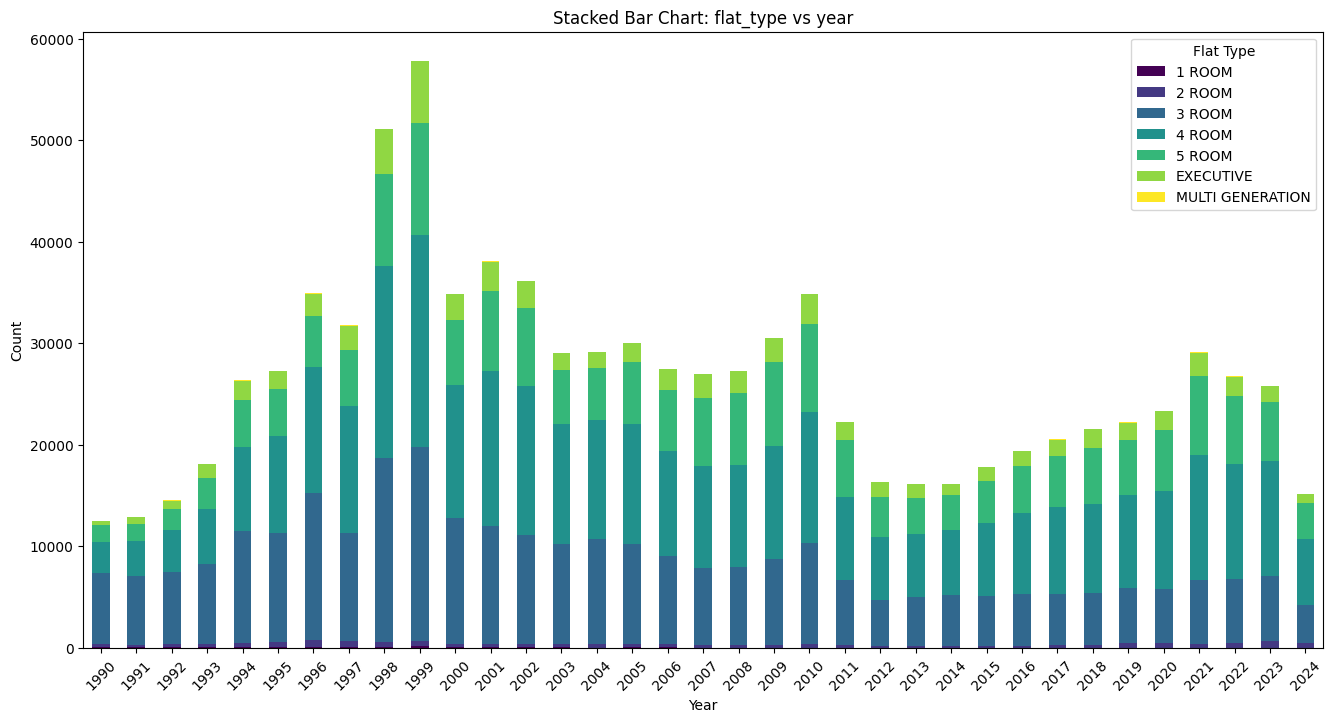

In [37]:
# Stacked Bar Chart for flat_type vs year
plt.figure(figsize=(16, 8))

df_year = df.groupby(['year', 'flat_type']).size().unstack()
df_year.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

plt.title('Stacked Bar Chart: flat_type vs year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Flat Type')
plt.xticks(rotation=45)
plt.show()

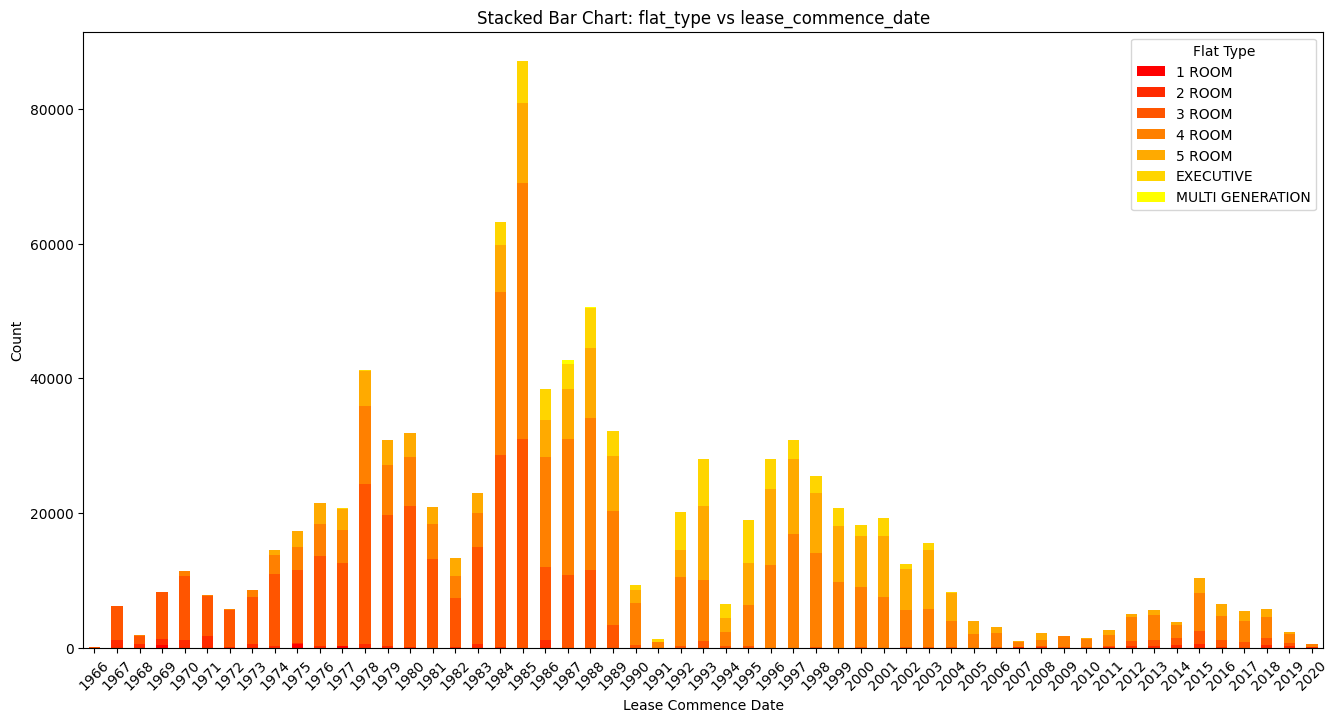

In [38]:
# Stacked Bar Chart for flat_type vs lease_commence_date
plt.figure(figsize=(16, 8))

df_lease_commence_date = df.groupby(['lease_commence_date', 'flat_type']).size().unstack()
df_lease_commence_date.plot(kind='bar', stacked=True, colormap='autumn', ax=plt.gca())

plt.title('Stacked Bar Chart: flat_type vs lease_commence_date')
plt.xlabel('Lease Commence Date')
plt.ylabel('Count')
plt.legend(title='Flat Type')
plt.xticks(rotation=45)
plt.show()

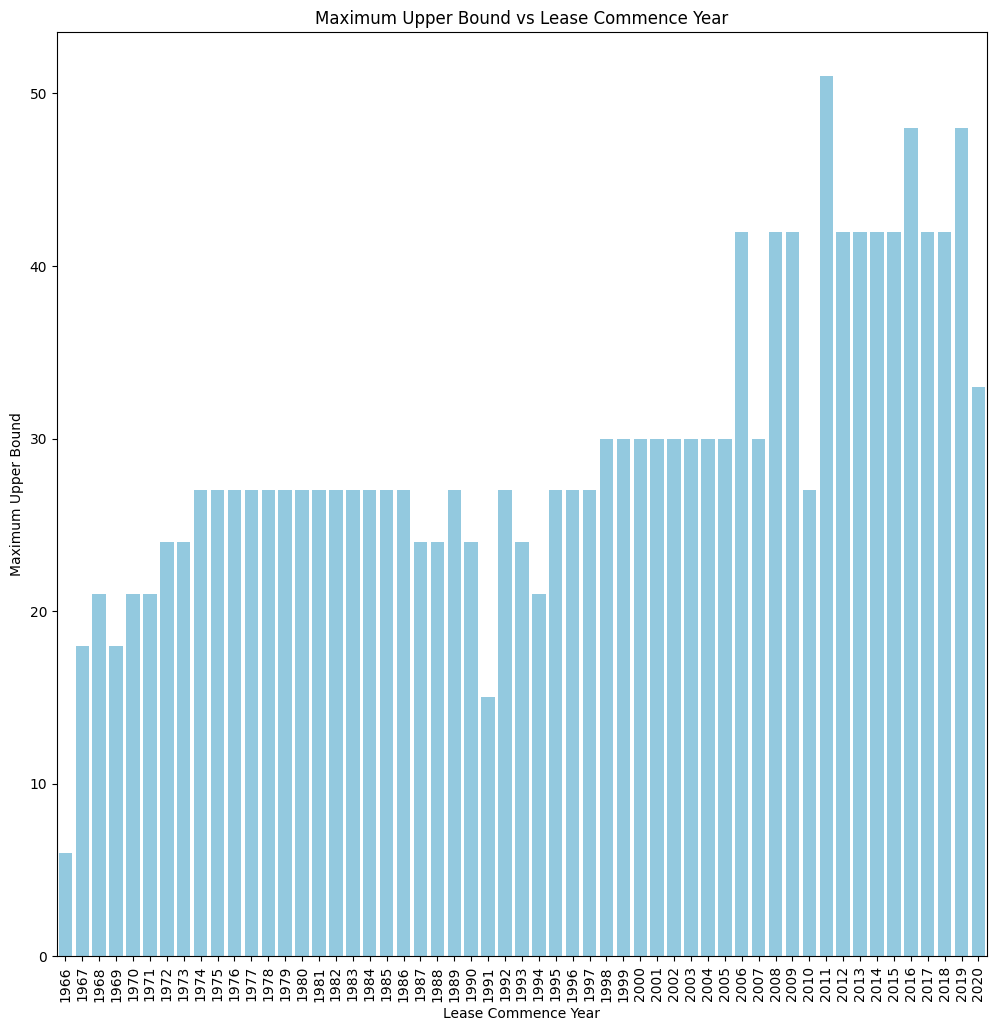

In [39]:
plt.figure(figsize=(12, 12))

# Group by lease_commence_year and find the maximum value of upper_bound for each group
max_upper_bound = df.groupby('lease_commence_date')['upper_bound'].max().reset_index()

# Create a bar plot using seaborn
sns.barplot(x='lease_commence_date', y='upper_bound', data=max_upper_bound, color='skyblue')

# Set plot labels and title
plt.title('Maximum Upper Bound vs Lease Commence Year')
plt.xlabel('Lease Commence Year')
plt.ylabel('Maximum Upper Bound')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [40]:
# Grouping the flats sold by month and flat model
total_units_by_month_flat_model = df.groupby(['month', 'flat_model']).size().reset_index(name='total_units')

# Convert month integers to month names
total_units_by_month_flat_model['month'] = total_units_by_month_flat_model['month'].apply(lambda x: calendar.month_abbr[x])

fig = px.line_polar(total_units_by_month_flat_model, r="total_units", theta="month", color="flat_model", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)
fig.show()

In [41]:
# Grouping the flats sold by month and Year
total_units_by_month_year = df.groupby(['month', 'year']).size().reset_index(name='total_units')

# Convert month integers to month names
total_units_by_month_year['month'] = total_units_by_month_year['month'].apply(lambda x: calendar.month_abbr[x])

fig = px.line_polar(total_units_by_month_year, r="total_units", theta="month", color="year", line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r
                    )
fig.show()

## Model Building and evaluation

### Linear Regression

In [42]:
# Drop irrelevant columns
selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
                    'current_remaining_lease', 'years_holding', 'resale_price']
dftrain = df[selected_columns]

# Separate features (X) and target variable (y)
X = dftrain.drop('resale_price', axis=1)
y = dftrain['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the regression model
model = LinearRegression()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# save the model
model_filename = 'singapore_flats_linear.joblib'
joblib.dump(pipeline, model_filename)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)


# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error (MAE): 52471.75943637576
Mean Squared Error (MSE): 4705995773.580501
Root Mean Squared Error (RMSE): 68600.26073988713
R-squared (R2) Score: 0.8394570160497651


### Decision Tree Regression

In [43]:
# Drop irrelevant columns
selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
                    'current_remaining_lease', 'years_holding', 'resale_price']
dftrain = df[selected_columns]

# Separate features (X) and target variable (y)
X = dftrain.drop('resale_price', axis=1)
y = dftrain['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the regression model
model = DecisionTreeRegressor(random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# save the model
model_filename = 'singapore_flats_decision_tree.joblib'
joblib.dump(pipeline, model_filename)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)



# Print or use the metrics as needed
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error (MAE): 20637.72640629061
Mean Squared Error (MSE): 958490654.6688039
Root Mean Squared Error (RMSE): 30959.50023286558
R-squared (R2) Score: 0.9673015112650926


### K-Nearest Neighbours Regression

In [44]:
# Drop irrelevant columns
selected_columns = ['year', 'town', 'flat_type', 'flat_model', 'storey_range', 
                    'floor_area_sqm', 'lease_commence_date', 'remaining_lease', 
                    'current_remaining_lease', 'years_holding', 'resale_price']
dftrain = df[selected_columns]

# Separate features (X) and target variable (y)
X = dftrain.drop('resale_price', axis=1)
y = dftrain['resale_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the regression model
model = KNeighborsRegressor()

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model
pipeline.fit(X_train, y_train)

# save the model
model_filename = 'singapore_flats_knn.joblib'
joblib.dump(pipeline, model_filename)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)



# Print or use the metrics as needed
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 21417.273938245
Mean Squared Error (MSE): 1016419540.6036088
Root Mean Squared Error (RMSE): 31881.33530145199
R-squared (R2) Score: 0.9653252927021485
